# Predicting churn using the Telco Customer Churn dataset.
source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [60]:
import numpy as np
import pandas as pd

churn_df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
#Check if all the neccesary features is there
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Some things that could help further improve this mode.
- one is how satisfied with the company or even how often does those that have called text support
- Competiton data during this period, maybe they left because someone offered a better deal
- Do they have contacts, friends or family subscribed there or other places
- Information about when they left
- Information about the region the customer resides in
- Reasons for churn
- Age of the customer
- 

In [62]:
#change columns name to lowercase
churn_df.columns = churn_df.columns.str.strip().str.lower()

In [63]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [64]:
churn_df.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
churn_df.describe(include=object)

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [66]:
churn_df['totalcharges'].isnull().value_counts()

False    7043
Name: totalcharges, dtype: int64

In [67]:
#get the unique values of tri and fourth value columns
for col in ['multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paymentmethod']:
    print(col, churn_df[col].unique())

multiplelines ['No phone service' 'No' 'Yes']
internetservice ['DSL' 'Fiber optic' 'No']
onlinesecurity ['No' 'Yes' 'No internet service']
onlinebackup ['Yes' 'No' 'No internet service']
deviceprotection ['No' 'Yes' 'No internet service']
techsupport ['No' 'Yes' 'No internet service']
streamingtv ['No' 'Yes' 'No internet service']
streamingmovies ['No' 'Yes' 'No internet service']
contract ['Month-to-month' 'One year' 'Two year']
paymentmethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [68]:
#change binary columns to numeric values, 1 is yes, 0 is no, female 1, male 0

bin_cols = ['gender','partner', 'dependents', 'phoneservice', 'paperlessbilling', 'churn']
for i, bin_col in enumerate(bin_cols):
    if i == 0:
        churn_df[bin_col] = churn_df[bin_col].map({'Female': 1, 'Male': 0})
    else:
        churn_df[bin_col] = churn_df[bin_col].map({'Yes': 1, 'No': 0})

In [69]:

#Change columns with 3 strings into numerical values 0,1,2

tri_yes_no_nis_cols = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
for tri_col in tri_yes_no_nis_cols:
    churn_df[tri_col] = churn_df[tri_col].map({'No internet service': 2, 'Yes': 1, 'No': 0})

churn_df['internetservice'] = churn_df['internetservice'].map({'DSL': 2, 'Fiber optic': 1, 'No': 0})
churn_df['contract'] = churn_df['contract'].map({'Month-to-month': 2, 'One year': 1, 'Two year': 0})
churn_df['multiplelines'] = churn_df['multiplelines'].map({'No phone service': 2, 'Yes': 1, 'No': 0})

#Four value columns to numeric
churn_df['paymentmethod'] = churn_df['paymentmethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Bank transfer (automatic)': 1,
 'Credit card (automatic)': 0})

In [70]:
churn_df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,...,0,0,0,0,2,1,3,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,...,1,0,0,0,1,0,2,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,...,0,0,0,0,2,1,2,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,...,1,1,0,0,1,0,1,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,2,1,3,70.70,151.65,1


In [71]:
#Seems like there is still string values, since there aren't any null values or empty, determine which column
for col_name in churn_df:
    print(col_name, churn_df[col_name].eq(' ').value_counts())

customerid False    7043
Name: customerid, dtype: int64
gender False    7043
Name: gender, dtype: int64
seniorcitizen False    7043
Name: seniorcitizen, dtype: int64
partner False    7043
Name: partner, dtype: int64
dependents False    7043
Name: dependents, dtype: int64
tenure False    7043
Name: tenure, dtype: int64
phoneservice False    7043
Name: phoneservice, dtype: int64
multiplelines False    7043
Name: multiplelines, dtype: int64
internetservice False    7043
Name: internetservice, dtype: int64
onlinesecurity False    7043
Name: onlinesecurity, dtype: int64
onlinebackup False    7043
Name: onlinebackup, dtype: int64
deviceprotection False    7043
Name: deviceprotection, dtype: int64
techsupport False    7043
Name: techsupport, dtype: int64
streamingtv False    7043
Name: streamingtv, dtype: int64
streamingmovies False    7043
Name: streamingmovies, dtype: int64
contract False    7043
Name: contract, dtype: int64
paperlessbilling False    7043
Name: paperlessbilling, dtype: int6

For such a small of missing values, the mean value could be able to replace it, another solution could be to calculate it with other features that already exist in the dataset, looking at the documentation(https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113), I could have just taken the monthly charge and multiply it with the tenure. The problem is that the customers monthly charge when they first signed up and their current may be very different based on services they continued or discontinued, and also the price change that could happen for these services over time.

In [72]:
tc_missing_value_rows = churn_df[churn_df['totalcharges'].str.contains(' ')]
tc_missing_value_rows

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,1,0,1,1,0,0,2,2,1,...,1,1,1,0,0,1,1,52.55,,0
753,3115-CZMZD,0,0,0,1,0,1,0,0,2,...,2,2,2,2,0,0,2,20.25,,0
936,5709-LVOEQ,1,0,1,1,0,1,0,2,1,...,1,0,1,1,0,0,2,80.85,,0
1082,4367-NUYAO,0,0,1,1,0,1,1,0,2,...,2,2,2,2,0,0,2,25.75,,0
1340,1371-DWPAZ,1,0,1,1,0,0,2,2,1,...,1,1,1,0,0,0,0,56.05,,0
3331,7644-OMVMY,0,0,1,1,0,1,0,0,2,...,2,2,2,2,0,0,2,19.85,,0
3826,3213-VVOLG,0,0,1,1,0,1,1,0,2,...,2,2,2,2,0,0,2,25.35,,0
4380,2520-SGTTA,1,0,1,1,0,1,0,0,2,...,2,2,2,2,0,0,2,20.00,,0
5218,2923-ARZLG,0,0,1,1,0,1,0,0,2,...,2,2,2,2,1,1,2,19.70,,0
6670,4075-WKNIU,1,0,1,1,0,1,1,2,0,...,1,1,1,0,0,0,2,73.35,,0


In [73]:
churn_df[churn_df['tenure'].eq(0)]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,1,0,1,1,0,0,2,2,1,...,1,1,1,0,0,1,1,52.55,,0
753,3115-CZMZD,0,0,0,1,0,1,0,0,2,...,2,2,2,2,0,0,2,20.25,,0
936,5709-LVOEQ,1,0,1,1,0,1,0,2,1,...,1,0,1,1,0,0,2,80.85,,0
1082,4367-NUYAO,0,0,1,1,0,1,1,0,2,...,2,2,2,2,0,0,2,25.75,,0
1340,1371-DWPAZ,1,0,1,1,0,0,2,2,1,...,1,1,1,0,0,0,0,56.05,,0
3331,7644-OMVMY,0,0,1,1,0,1,0,0,2,...,2,2,2,2,0,0,2,19.85,,0
3826,3213-VVOLG,0,0,1,1,0,1,1,0,2,...,2,2,2,2,0,0,2,25.35,,0
4380,2520-SGTTA,1,0,1,1,0,1,0,0,2,...,2,2,2,2,0,0,2,20.00,,0
5218,2923-ARZLG,0,0,1,1,0,1,0,0,2,...,2,2,2,2,1,1,2,19.70,,0
6670,4075-WKNIU,1,0,1,1,0,1,1,2,0,...,1,1,1,0,0,0,2,73.35,,0


Seems like all totalcharges that are missing from are from customers data are from people that have 0 tenure, in this case it would seem that maybe it hasn't been 1 month for them yet, none of them left so it's relevant data to include, the totalcharge will then be the monthly charge

In [74]:
#Replace totalcharges with monthly charges for those rows that have empty tc
churn_df['totalcharges'] = churn_df['totalcharges'].replace(' ', np.nan)
churn_df['totalcharges'].fillna(churn_df['monthlycharges'], inplace=True)

#transform object to float
churn_df['totalcharges'] = churn_df['totalcharges'].astype(float)

In [75]:
from sklearn.model_selection import train_test_split as tts

#create 2 df, one with churn column and one without
X = churn_df.drop(['churn', 'customerid'], axis=1)
y = churn_df['churn']

X_train, X_test, y_train, y_test = tts(X, y, random_state=42, test_size=0.2)

In [76]:
X.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,2,1,3,29.85,29.85
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,2,56.95,1889.50
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,2,1,2,53.85,108.15
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,1,42.30,1840.75
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,2,1,3,70.70,151.65


- Female: 1,
- Male: 0,
- yes: 1,
- no: 0,
- no internet service: 2,
- no phone service: 2,
- Electronic check: 3,
- Mailed check: 2, 
- Bank transfer (automatic): 1,
- Credit card (automatic): 0
- DSL: 2,
- Fiber optic: 1
- Month-to-month: 2, 
- One year: 1, 
- Two year: 0

In [77]:
from sklearn.linear_model import LogisticRegression as lr
from scipy.stats import chi2
import statsmodels.api as sm

In [78]:
#Test each feature with the Wald Test to see if all is
X_train_sm = sm.add_constant(X_train)
sm_model = sm.Logit(y_train, X_train_sm)
result = sm_model.fit()

#Get the coveriance matrix
cov_mat = result.cov_params()

coefficients = []
standard_errors = []
z_scores = []
p_values = []

for i, y_col in enumerate(['const'] + list(X.columns)):
    # Calculate the coefficient for the features
    coef = result.params[i]
    coefficients.append(coef)
    
    # Calculate the standard error for the features
    se = np.sqrt(cov_mat.iloc[i, i])
    standard_errors.append(se)

    # Compute the z-score
    z_score = coef / se
    z_scores.append(z_score)

    # Compute the p-value using the chi-squared distribution
    p_value = 1 - chi2.cdf(z_score**2, 1)
    p_values.append(p_value)

Optimization terminated successfully.
         Current function value: 0.418798
         Iterations 8


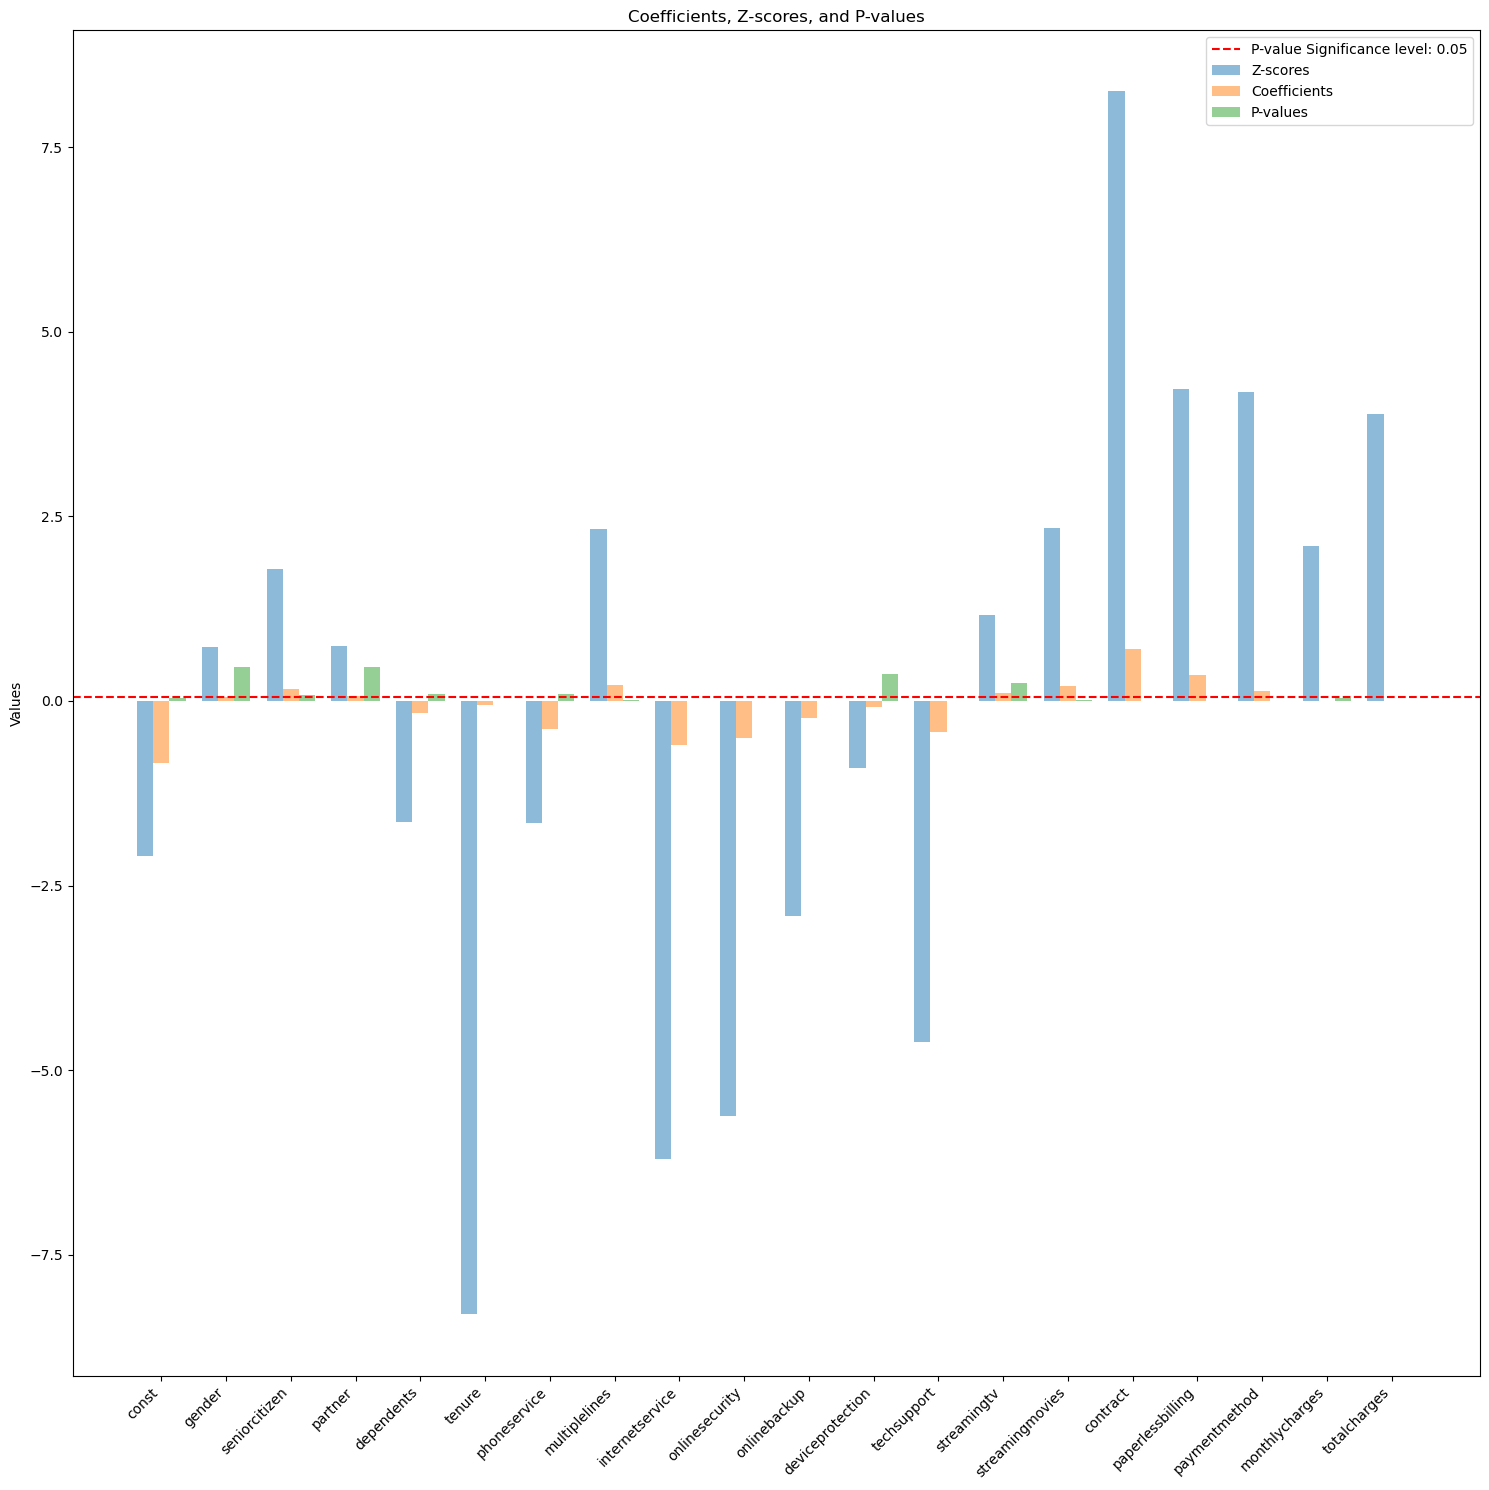

In [79]:
#Create a bar plot for easier visualtization
import matplotlib.pyplot as plt

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 15))
bar_width = 0.25
x_pos = np.arange(len(coefficients))

ax.bar(x_pos - bar_width, z_scores, width=bar_width, align='center', alpha=0.5, label='Z-scores')
ax.bar(x_pos, coefficients, width=bar_width, align='center', alpha=0.5, label='Coefficients')
ax.bar(x_pos + bar_width, p_values, width=bar_width, align='center', alpha=0.5, label='P-values')

ax.set_xticks(x_pos)
ax.set_xticklabels(['const'] + list(X.columns), rotation=45, ha='right')
ax.set_ylabel('Values')
ax.set_title('Coefficients, Z-scores, and P-values')
ax.legend()

# Add a horizontal line representing the significance level
significance_level = 0.05
ax.axhline(significance_level, color='red', linestyle='--', label=f'P-value Significance level: {significance_level}')
ax.legend()

plt.tight_layout()
plt.show()

Seems like there could be some features that may not be that relevant for this model, I will create 2 test to see if those are actually needed.

In [80]:
from sklearn.linear_model import LogisticRegressionCV as lr_cv

In [182]:
clf_whole = lr_cv(cv=50, random_state=42, max_iter=500).fit(X_train, y_train)
score_whole = clf_whole.score(X_test, y_test)
print(f"Accuracy: {score_whole:.5f}")

Accuracy: 0.81902


In [183]:
clf_feature_dropped = lr_cv(cv=50, random_state=42, max_iter=500).fit(X_train.drop(['gender', 'partner', 'deviceprotection', 'streamingtv'], axis=1), y_train)
score_feature_dropped = clf_feature_dropped.score(X_test.drop(['gender', 'partner', 'deviceprotection', 'streamingtv'], axis=1), y_test)
print(f"Accuracy: {score_feature_dropped:.5f}")

Accuracy: 0.81760


Since dropping the columns with less relevancy from the dataset, the result is almost identical, meaning you may be able to survive without it, but all in all with the whole feature set, the model was able to persom better, so that is something to keep in mind, this is more of a question of accuracy vs performance. 

In [203]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score

# create base estimators for XGBoost
log_r = lr_cv(cv=50, random_state=42, max_iter=500)
dt = dtc(max_depth=10, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(16,), activation="relu", solver="adam", random_state=42)

# create a list of base estimators
base_estimators = [("lr", log_r), ("dt", dt), ("nn", nn)]

# set the XGBoost parameters(and try to prevent over and underfitting)
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth": 2,
    "min_child_weight": 2,
    "subsample": 0.6,
    "colsample_bytree": 0.8,
    "seed": 42,
    "scale_pos_weight": 1.1,
    "tree_method": "approx",
}

# create an XGBoost classifier with multiple base estimators
bst = xgb.XGBClassifier(base_score=0.5, **params, n_estimators=220, random_state=42)

# train the model
bst.fit(X_train, y_train)

# make predictions on the test set
y_pred = bst.predict(X_test)

# evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")


Accuracy: 0.82328


Wasn't able to raise the accuracy significantly, and I was probably overfitting with the hyperparameters in order to get 1 percent more in accuracy.